In [1]:
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

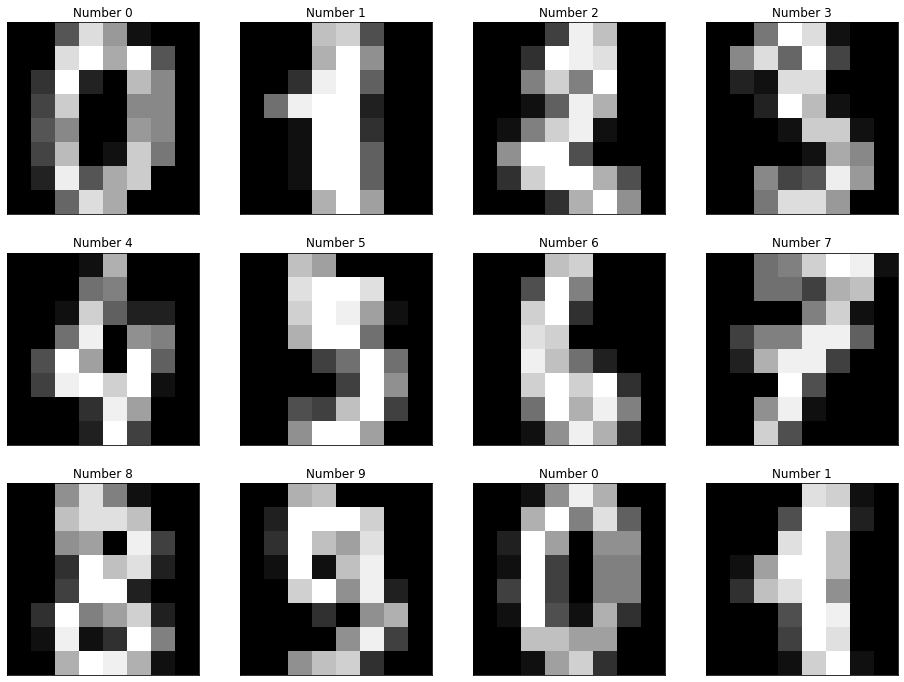

In [7]:
#lets see the data in a plot
n_rows = 3
n_cols = 4
n_img  = n_rows*n_cols
plt.figure(figsize=(4*n_cols, 4*n_rows))
for i, (img, label) in enumerate(zip(digits.data[0:n_img], digits.target[0:n_img])):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray)
    plt.tick_params(left=False, labelleft=False ,bottom=False, labelbottom=False)
    plt.title(f"Number {label}")

In [8]:
#the df
pd.DataFrame(digits.data, columns=digits.feature_names).head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [26]:
#1. lets split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, train_size=0.8)

#2. initialize the model to use
lr = LogisticRegression(max_iter=1e4)

#3. train the model
lr.fit(X=X_train, y=y_train)

LogisticRegression(max_iter=10000.0)

In [27]:
#4. let's test the model
n = 15
print("The real      targets for the first %i testing pictures are : "%n, y_test[0:n])
print("The predicted targets for the first %i testing pictures were: "%n, lr.predict(X_test[0:n]))

The real      targets for the first 15 testing pictures are :  [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6]
The predicted targets for the first 15 testing pictures were:  [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6]


In [28]:
#we see that for the first n pictures the prediction was almost successful, lets see the score (accuracy) of the model
#accuracy = correc_predictions/total
print("accuracy testing : ", lr.score(X=X_test, y=y_test))
print("accuracy training: ", lr.score(X=X_train, y=y_train))

accuracy testing :  0.9583333333333334
accuracy training:  1.0


Text(56.760000000000005, 0.5, 'True Label')

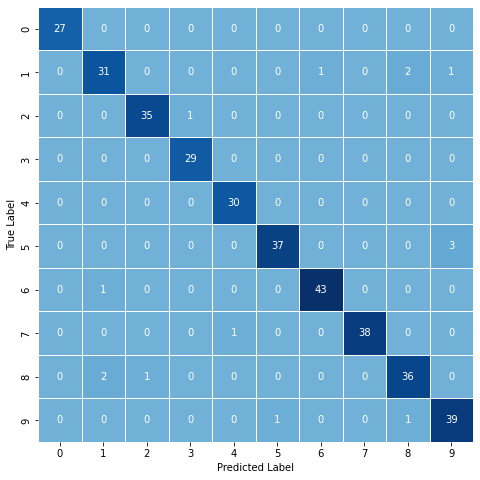

In [29]:
#lets see the confussion matrix
cm = metrics.confusion_matrix(y_true=y_test, y_pred=lr.predict(X_test))

fig, ax = plt.subplots(figsize=(8,8))
sbn.heatmap(cm, annot=True, square=True, cmap="Blues", ax=ax, center=True, cbar=False, linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [9]:
#this one tell us that, for example, there were three 5's that were predected as a 9.

In [30]:
# sensitivity = TP/(TP+FN) (also known as "recall")
# precision   = TP/(TP+FP)
# f1 = 2*sensitivity*precision/(sensitivity+precision)
#when we want to reduce the FP we look for a precision close to 1
#if we wan to reduce the FN we look for a sensitivity close to 1
#f1 is an harmonic mean

#A way to increase the sensitivity is to reduce the FN by increasing the threshold with lr.predict_proba that is by default set to 0.5
#And if we want to increase the precision we need to reduce the FP by reducing the threshold. 
#If we reduce the FP we increase the FN and vice-versa.

In [31]:
#we can see a general report of the metrics of our model by using metrics.classification_report()
class_report = metrics.classification_report(y_true=y_test, y_pred=lr.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.92      0.92      0.92        39
           9       0.91      0.95      0.93        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### Changing the threshold 

In [95]:
#As we said above we can change the threshold of the decision function to change either the precision or the sensitivity.
#if we want to increase the precision we reduce the threshold
pred = []
threshold = 0.5
for i in range(len(X_test)):
    try:
        max_ = max(lr.predict_proba(X_test)[i]>threshold)
        pred.append( list(lr.predict_proba(X_test)[i]).index(max_))
    except:
        pred.append()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [100]:
lr.decision_function(X_test)[301]

array([  1.15205269,   7.67439358,  -1.63984267, -17.65893892,
        -0.73199112,  -2.22028628,   7.93810611,   2.87253438,
         7.01517747,  -4.40120522])

In [87]:
print(np.array(pred)[301])

6


In [85]:
lr.predict_proba(X_test)[301]

array([5.19685286e-04, 3.53473678e-01, 3.18592591e-05, 3.51747134e-12,
       7.89788111e-05, 1.78300359e-05, 4.60135749e-01, 2.90359557e-03,
       1.82836610e-01, 2.01368325e-06])

In [79]:
#[list(lr.predict_proba(X_test)[i]>0.5).index(True) for i in range(200)]

In [80]:
lr.predict(X_test)==pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [164]:
lr.predict(X_test)[301]

6